# Avaliando o coeficiente de correlação (r de Pearson)

Este notebook contém diversas formas de avaliar o coeficiente de Pearson utilizando Python

- Estimação do coeficiente;
- Significância do coeficiente (bilateral);
- Intervalo de confiança do coeficiente;
- Gráfico com a estimativa do intervalo de confiança;


![gif on r pearson](https://raw.githubusercontent.com/andersonmdcanteli/statistic/master/Python/pt-br/r-pearson/gif.gif "gif gerado com os gráficos de Pearson")



## Descrição do coeficiente

O coeficiente de correlação de Pearson é uma medida de associação linear entre duas variáveis quantitativas. Ele foi desenvolvido pelo matemático inglês Karl Pearson no final do século XIX e é amplamente utilizado na estatística e na análise de dados.

O cálculo do coeficiente de correlação de Pearson envolve a determinação da covariância das variáveis em questão e da variância de cada uma delas. O resultado é um número que varia entre -1 e 1, onde -1 indica uma correlação negativa perfeita, 1 indica uma correlação positiva perfeita e valores próximos a zero indicam ausência de correlação linear.

O coeficiente de correlação de Pearson é amplamente utilizado na análise de dados para avaliar a força e a direção da associação linear entre duas variáveis. Ele é amplamente utilizado em diversas áreas, incluindo biologia, economia, psicologia e outras áreas da ciência.

O coeficiente de Pearson ($r_{perason})$ é estimado da seguinte forma:


$$r_{pearson} = \frac{\sum_{i=1}^n (x_i - \overline{x}) (y_i - \overline{y})}{\sqrt{\sum_{i=1}^n ((x_i - \overline{x})^2 \sum_{i=1}^n ((y_i - \overline{y})^2}}$$

onde
- $x_i$ é a i-ésima observação da variável independente;
- $\overline{x}$ é a média da variável independente;
- $y_i$ é a i-ésima observação da variável dependente;
- $\overline{y}$ é a média da variável dependente;
- $n$ é o número total de observações;



## Importações

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 10

## Entrada de dados

In [2]:
# 5 primeiras observações do comprimento das sépalas da flor de Iris setosa
x = np.array([5.1, 4.9, 4.7, 4.6, 5])
x_label = "Comprimento das sépalas ($cm$)"
# 5 primeiras observações da largura das sépalas da flor de Iris setosa
y = np.array([3.5, 3, 3.2, 3.1, 3.6])
y_label = "Largura das sépalas ($cm$)"
# Nível de significância
alfa = 0.05
# Tamanho amostral
n_size = x.size

## Visualização dos dados

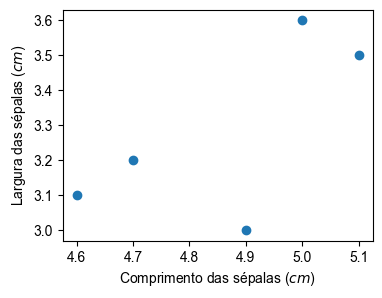

In [3]:
plt.figure(figsize=(4,3))
plt.scatter(x,y, label="Dados")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.show()

## Estimação do valor do $r_{pearson}$

O coeficiente de correlação pode ser estimado utilizando a função [stats.pearsonr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) da biblioteca `scipy`. Basta apenas passar o dados de $x$ e $y$ como argumentos:

In [4]:
r_pearson, p_pearson = stats.pearsonr(x,y)
print("r pearson = ", round(r_pearson, 4))

r pearson =  0.68


### Interpretação

De forma geral, podemos classificar a correlação linear entre $x$ e $y$ da seguinte forma:


| Intervalo de $r_{pearson}$ | Interpretação |
| :-: | :-: |
| 0.90 $< r \le$ 1 | Forte correlação positiva |
| 0.70 $< r \le$ 0.90 | Correlação positiva |
| 0.50 $< r \le$ 0.70 | Correlação moderadamente positiva |
| 0.30 $< r \le$ 0.50 | Baixa correlação positiva |
| -0.30 $\le r \le$ 0.30 | Ausência de correlação |
| -0.50 $\le r <$ -0.30 | Baixa correlação negativa |
| -0.70 $\le r <$ -0.50 | Correlação moderadamente negativa |
| -0.90 $\le r <$ -0.70 | Correlação negativa |
| -1 $\le r <$ -0.90 | Forte correlação negativa |

In [5]:
if r_pearson > .9:
    text = "Forte correlação linear positiva"
elif r_pearson > .7:
    text = "Correlação linear positiva"
elif r_pearson > .5:
    text = "Correlação linear moderadamente positiva"
elif r_pearson > .3:
    text = "Baixa correlação linear positiva"    
elif -0.3 <= r_pearson <= 0.3:
    text = "Ausência de correlação linear"
elif r_pearson >= -0.5:
    text = "Baixa correlação linear negativa"    
elif r_pearson >= -0.7:
    text = "Correlação linear moderadamente negativa"        
elif r_pearson >= -0.9:
    text = "Correlação linear negativa"            
else:
    text = "Forte correlação linear negativa"                

text = text + f" (r_pearson = {round(r_pearson, 4)})"
text

'Correlação linear moderadamente positiva (r_pearson = 0.68)'

## Verificando a significância do coeficiente de Pearson

Em alguns casos é útil um teste de hipótese para verificar se o coeficiente de correlação é significativo. Partimos do pressuposto que o coeficiente de correlação ($\rho $, que é adotado para denotar o valor populacional) é igual a 0, e procuramos por evidências para falsear esta hipótese. Ou seja:

> $H_0$: $\rho =0$;

> $H_1$: $\rho  \neq 0$;

A estatística do teste é estimada da seguinte forma:

$$ t_0 = \frac{r_{pearson}\sqrt{n-2}}{\sqrt{1-r_{pearson}^2}}$$

que segue a distribuição *t-Student* com $n-2$ graus de liberdade ***SE*** a hipótese nula for verdadeira. Neste caso, o valor crítico é obtido através da distribuição *t-Student* e a conclusão do teste é:

> Se $|t_0| > t_{\left(1-\alpha /2, n-2 \right)}$ ou ($p-valor < \alpha$), temos evidências para rejeitar a hipótese nula, e $\rho \neq 0 $;

> Se $|t_0| \leq t_{\left( 1-\alpha /2, n-2\right)}$ ou ($p-valor \geq \alpha$), não temos evidências para rejeitar a hipótese nula, e $\rho = 0 $;



### Calculando a estatística do teste

In [6]:
t_calc_pearson = r_pearson*np.sqrt(n_size - 2)/np.sqrt(1-np.square(r_pearson))
print("t0 = ", round(t_calc_pearson, 4))

t0 =  1.6064


### Obtendo o valor crítico da distribuição t de Student

In [7]:
t_critico_pearson = stats.t.ppf(1 - alfa/2, n_size - 2)
print("t critico = ", round(t_critico_pearson, 4))

t critico =  3.1824


### Concluindo o teste

In [8]:
if t_calc_pearson > t_critico_pearson:
    print(f"Rejeita H0, e o coeficiente de Pearson é diferente de zero (com {100*(1-alfa)}% de confiança).")
else:
    print(f"Falha em rejeitar H0, e o coeficiente de Pearson é igual a zero (com {100*(1-alfa)}% de confiança).")

Falha em rejeitar H0, e o coeficiente de Pearson é igual a zero (com 95.0% de confiança).


O $p-valor$ deste teste é o segundo valor retornado por `stats.pearsonr(x,y)`. Contudo, este p-valor é valido apenas para o caso da hipótese nula não ter sido rejeitada.

In [9]:
print("p-valor = ", round(p_pearson, 4))

p-valor =  0.2065


> NOTA: o resultado acima é igual ao obtido ao verificar a significância do coeficiente angular quando se ajusta a equação da reta.

## Para os casos onde $\rho \neq 0$

Quando o coeficiente de correlação é diferente de 0, não podemos utilizar a distribuição t-Student pois a distribuição do r de Pearson não é Normal; é *skewed*. Por exemplo, r = 0.90, a correlação real da população não poderia ser maior que 1.0, mas poderia ser substancialmente menor do que 0.90.

Isto é contornado transformando o coeficiente de Pearson utilizando a transformação [r-para-Z de Fisher](https://en.wikipedia.org/wiki/Fisher_transformation), que é uma função tangente hiperbolica inversa cuja distribuição é aproximadamente normalmente distribuída, com variância estável sobre diferentes valores de r.

Esta distribuição Z tem média:

$$ \mu_Z = arctanh \; r_{pearson} = \frac{1}{2} \ln{\frac{1 + r_{pearson}}{1 - r_{pearson}}} $$

E devio padrão igual a:

$$ \sigma_Z = \sqrt{\frac{1}{n-3}} $$

A estatística do teste pode ser formulada da seguinte forma:

$$ Z_0 = \left(arctanh \; \left(r \right) -arctanh \; \left(\rho_0\right)\right) \sqrt{n-3} $$

onde $\rho_0$ é o valor esperado para o coeficiente de correlação. As hipóteses para este caso são:


> $H_0$: $\rho = \rho_0$;

> $H_1$: $\rho  \neq \rho_0$;

Os valores críticos são obtidos da distribuição Normal padrão bilateral ($Z_{\left(1-\alpha/2 \right)}$). Podemos então concluir o teste da seguinte forma:

> Se $|Z_0| > Z_{\left(1-\alpha/2 \right)}$ (ou $p-valor < \alpha$), temos evidências para rejeitar a hipótese nula, e $\rho \neq \rho_0 $;

> Se $|Z_0| \leq Z_{\left(1-\alpha/2 \right)}$ (ou $p-valor \geq \alpha$), não temos evidências para rejeitar a hipótese nula, e $\rho = \rho_0 $;

Para exemplificar, vamos verificar se o coeficiente de Pearson do conjunto de dados é igual a 0.99.

In [10]:
target = 0.99

Inicialmente, calculamos a estatística do teste:

In [11]:
Z_0 = (np.arctanh(r_pearson) - np.arctanh(target))*np.sqrt((n_size - 3))
Z_0

-2.570336661278802

Agora é preciso obter o valor crítico do teste

In [12]:
z_critical = stats.norm.ppf(1 - alfa/2)
z_critical

1.959963984540054

Basta então comparar a estatística do teste com o valor crítico:

In [13]:
if np.abs(Z_0) > z_critical:
    print(f"Rejeita H0, e o coeficiente de Pearson é diferente de {target} (com {100*(1-alfa)}% de confiança).")
else:
    print(f"Falhar em rejeitar H0, e o coeficiente de Pearson é igual a {target} (com {100*(1-alfa)}% de confiança).")

Rejeita H0, e o coeficiente de Pearson é diferente de 0.99 (com 95.0% de confiança).


Podemos estimar o $p-valor$ para $Z_{0}$:

In [14]:
(1 - stats.norm.cdf(np.abs(Z_0)))*2

0.01015997257626955

> Note que já sabiamos que o coeficiente de Pearson era igual a 0 (através do teste t de Student). O teste acima foi feito apenas para ter um exemplo numérico.

## Intervalo de confiança do Coeficiente de Pearson

Para estimar o intervalo de confinça do $r_{pearson}$, basta estimar os limites inferior e superior utilizando a transformação r-para-Z de Fisher. 

O limite inferior é estimado através da relação:

$$ LI_{pearson} = \tanh{\left(arctahnh \; \left(r_{pearson}\right) - \frac{Z_{\left(1-\alpha/2 \right)}}{\sqrt{n-3}}\right)} $$

e o limite superior:

$$ LS_{pearson} = \tanh{\left(arctahnh \; \left(r_{pearson}\right) + \frac{Z_{\left(1-\alpha/2 \right)}}{\sqrt{n-3}}\right)} $$

Observe que estamos transformando o coeficiente de pearson para a escala proposta por Fisher, estimando o intervalo de confinça, e retornando a escala original.

> Note que o intervalo de confiança não será simétrico na escala original

Inicialmente, transformamos o coeficiente de pearson para a escala Z

In [16]:
# obtendo a média do r-pearson na escala transformada
r_pearson_z_scale = np.arctanh(r_pearson)
r_pearson_z_scale

0.8291499292396147

Em seguida estimamos o intervalo de confiança baseado na distribuição Normal

In [17]:
# obtendo o intervalo de confiança baseado na distribuição Normal
ic_z_scale = z_critical/np.sqrt(n_size-3)
ic_z_scale

1.3859038243496777

Agora, estimamos os limites inferior e superior, fazendo o valor de r de pearson transformado mais ou menos o intervalo de confiança estimado:

In [18]:
# calculando o limite inferior
ic_lower_z_scale = r_pearson_z_scale - ic_z_scale
ic_lower_z_scale

-0.556753895110063

In [19]:
# calculando o limite superior
ic_upper_z_scale = r_pearson_z_scale + ic_z_scale
ic_upper_z_scale

2.2150537535892925

Agora é necessário transformar os limites para a escala original, o que é feito com a função `np.tanh`:

In [20]:
# transformando para a escala original
ic_lower = np.tanh(ic_lower_z_scale)
ic_lower

-0.5055649868700101

In [21]:
ic_upper = np.tanh(ic_upper_z_scale)
ic_upper

0.9764540896505784

### Intervalo de confiança

Então construímos o intervalo de confiança do coeficiente de correlação. Note que ele ***não é simétrico***.

In [22]:
f"{round(ic_lower, 4)} <= {round(r_pearson, 4)} <= {round(ic_upper, 4)} (com {100*(1-alfa)}% de confiança)."

'-0.5056 <= 0.68 <= 0.9765 (com 95.0% de confiança).'

## Visualização gráfica

Podemos gerar um gráfico indicando os limites inferior e superior do coeficiente de Pearson, juntamente com a distribuição teórica, de forma a relacionar o coeficiente transformado com o coeficiente na escala original. 

Inicialmente, vamos criar o intervalo teórico para a função hiperbólica inversa:

In [23]:
r_values = np.linspace(-0.999, .999, 1000)
r_values_z_scale = np.arctanh(r_values)

> Note que a função `arctanh` aceita apenas valores entre -1 e 1, com intervalo *aberto*

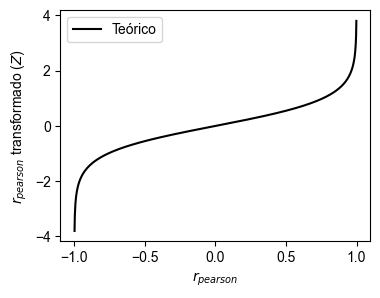

In [24]:
plt.figure(figsize=(4,3))
plt.plot(r_values, r_values_z_scale, label="Teórico", c="k")
plt.ylabel("$r_{pearson}$ transformado ($Z$)")
plt.xlabel("$r_{pearson}$")
plt.legend()
plt.show()

Agora podemos adicionar o valor obtido para o coeficiente de pearson, relacionando o valor transformado com o valor real:

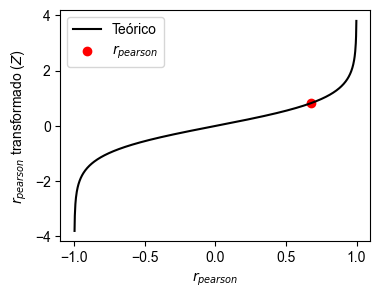

In [25]:
plt.figure(figsize=(4,3))
plt.plot(r_values, r_values_z_scale, label="Teórico", c="k")
plt.scatter(r_pearson, r_pearson_z_scale, label="$r_{pearson}$", c="r")
plt.ylabel("$r_{pearson}$ transformado ($Z$)")
plt.xlabel("$r_{pearson}$")
plt.legend()
plt.show()

E então adicionamos os limites inferior e superior:

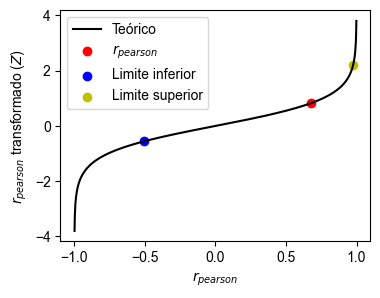

In [26]:
plt.figure(figsize=(4,3))
plt.plot(r_values, r_values_z_scale, label="Teórico", c="k")
plt.scatter(r_pearson, r_pearson_z_scale, label="$r_{pearson}$", c="r")
plt.scatter(ic_lower, ic_lower_z_scale, label="Limite inferior", c="b")
plt.scatter(ic_upper, ic_upper_z_scale, label="Limite superior", c="y")
plt.ylabel("$r_{pearson}$ transformado ($Z$)")
plt.xlabel("$r_{pearson}$")
plt.legend()
plt.show()

Uma edição mais adequada do gráfico resulta em

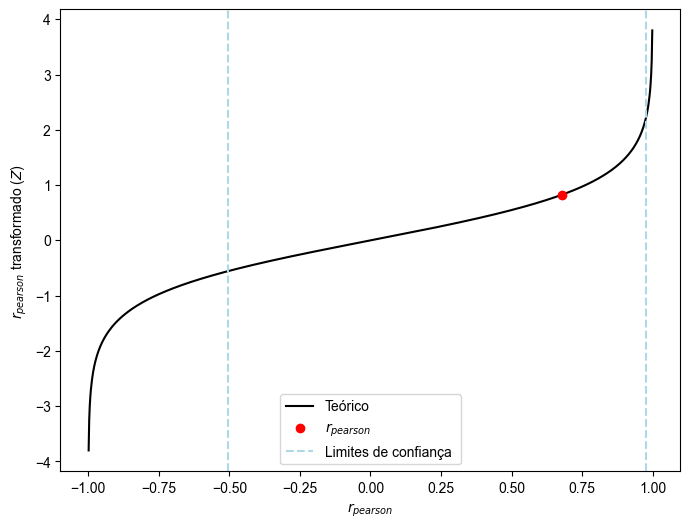

In [27]:
plt.figure(figsize=(8,6))
plt.plot(r_values, r_values_z_scale, label="Teórico", c="k", zorder=-1)
plt.scatter(r_pearson, r_pearson_z_scale, label="$r_{pearson}$", c="r")
plt.axvline(x=ic_lower, ymin=0, ymax=1, c="lightblue", ls="--", label="Limites de confiança ", )
plt.axvline(x=ic_upper, ymin=0, ymax=1, c="lightblue", ls="--")
plt.ylabel("$r_{pearson}$ transformado ($Z$)")
plt.xlabel("$r_{pearson}$")
plt.legend()
plt.show()

## Comentários

Apesar da baixa aplicabilidade, a estatística do coeficiente de Pearson e os testes de hipótese são uma excelente forma de demonstrar através de um conceito simples (o coeficiente de correlação), a importancia da forma da distribuição. 

Um ponto relevante a ser discutido é o uso da distribuição Normal para obter os valores críticos. No exemplo utilizado, temos apenas 5 observações, o que não é suficiente para adotar a distribuição Normal. Talvez o uso da distribuição t de Student seja mais adequada para conjuntos de dados pequenos ($n < 30$), de forma a "punir" o intervalo de confiança devido ao baixo tamanho amostral. 

Devido a baixo tamanho amostral, é muito provavel que o intervalo do coeficiente de Person esta sub-estimado.

## Outros recursos sobre o Coeficiente de Correlação de Pearson

### Recursos de aprendizado

- Um salto para ir além: O coeficiente de correlação de Pearson [link](https://github.com/andersonmdcanteli/statistic/blob/master/Python/pt-br/r-pearson/Um-salto-para-ir-alem.ipynb)

### Recursos para uso

- Script com funções criadas para avaliar o coeficiente de Pearson: [link](https://github.com/andersonmdcanteli/statistic/blob/master/Python/pt-br/r-pearson/functions.py)

### Recursos para ensino

- Script para criar gráficos, gif, e vídeos para exemplificar o coeficiente de correlação: [link](https://github.com/andersonmdcanteli/statistic/blob/master/Python/pt-br/r-pearson/r-plot.ipynb);

- Script para gerar gráfico do intervalo de confiança do coeficiente de Pearson variando o nível de significância ($\alpha$): [link](https://github.com/andersonmdcanteli/statistic/blob/master/Python/pt-br/r-pearson/r_pearson-intervalo-confianca-variando-alfa.ipynb);

- Script para gerar gráfico do intervalo de confiança do coeficiente de Pearson variando o tamanho amostral: [link](https://github.com/andersonmdcanteli/statistic/blob/master/Python/pt-br/r-pearson/r_pearson-intervalo-confianca-variando-tamanho-amostral.ipynb)

## Referências

- Wikipedia contributors. (2023, January 29). Fisher transformation. Wikipedia. https://en.wikipedia.org/wiki/Fisher_transformation. Acesso em 04/02/2023.

- Dou, S. (2018, May 30). How to compute confidence interval for Pearson’s r? A brief guide. Medium. https://shandou.medium.com/how-to-compute-confidence-interval-for-pearsons-r-a-brief-guide-951445b9cb2d. Acesso em 04/02/2023.

- Re: Loftus, G. R. & Loftus, E. F. (1988). Essence of Statistics (2ª Edition). New York: McGraw Hill. Disponível em <https://faculty.washington.edu/gloftus/P317-318/Useful_Information/r_to_z/PearsonrCIs.pdf>.

- Montgomery, D. C.; Peck, L. A.; Vining G. G. (2012). Introduction to Linear Regression Analysis (5ª Edição). JOHN WILEY & SONS, INC.
